# Strutural Equation Modelling (SEM) with Jupyter and Anaconda

This notebook is intended as an example of how to "do SEM" using different tools that are accessible in a Jupyter IPython Notebook installed with Anaconda. The notebook uses a Python3 kernel and interfaces with several R packages. Alternatives would be to run an R kernel in the notebook directly, or to use an RStudio markdown notebook and the reticulate package to access Python functionality from R.

<div style="text-align: right">Stefan Rank (strank at strank.info)</div>

To Do for future revisions:
    
* Integrate instructions on using different hosted / collaborative notebook options for this tutorial:

  * CoCalc: https://cocalc.com/
  * Google Colaboratory in Google Drive: https://colab.research.google.com/
    * (Python works, conda & R aren't available so most of the meat of this notebook won't work. If you block third-party cookies, you might have to allow cookies from \[*.\]googleusercontent.com to get output working)
  * Microsoft Azure Notebooks: https://notebooks.azure.com/
  * Binder: https://mybinder.org/
  * A JupyterHub server: https://jupyterhub.readthedocs.io/en/stable/ (if I ever get to installing one)

* Turn it into a RISE presentation https://rise.readthedocs.io/en/docs_hot_fixes/ (ideally also using the "Split Cells Notebook" extension for better visual organization)

* Integrate other SEM tools available in R:

  * lavaan, openmx, semplot (DONE)
  * sem (less well documented/supported)
  * metasem and metafor for meta-analysis (goes beyond normal SEM)
  * simsem's semtools
  * bigsem, ctsem https://github.com/cdriveraus/ctsem, gsem, lavaan.survey, regsem, semdiag
  
* Compare with other tools:

  * Onyx GUI for SEM http://onyx.brandmaier.de/

For local use, I recommend jupyterlab as the interface, usually acessible as http://localhost:8888/lab

## Installing Required (and Optional) Components

To run the code in this notebook, a local (or hosted) installation of Anaconda is required. The following installs R components available through Anaconda. We use the --yes option to avoid prompts for confirmation (impossible in the notebook) but that also means you cannot check what will be installed before it proceeds. To avoid this, you could run the installations from an Anaconda prompt or using the Anaconda Navigator.

R Studio is not strictly required, but it is a useful alternative way of using R. Also note that this assumes an Anaconda installation/environment that you have permission to change. On Windows, that means choosing the recommended "for this user only" option on install of Anaconda. Otherwise, these installations require Administrator / root rights.

In [2]:
!conda install --yes r-essentials

Solving environment: ...working... done

# All requested packages already installed.



In [3]:
# !conda install --yes rstudio

Solving environment: ...working... done

# All requested packages already installed.



In [4]:
!conda install --yes r-lavaan

Solving environment: ...working... done

# All requested packages already installed.



### Installing and Enabling the Python-R bridge

Now we need `rpy2` which provides the bridge between this python notebook and R. (Also installing tzlocal due to a current dependency bug in rpy2.)

In [3]:
!conda install --yes tzlocal rpy2

Solving environment: ...working... done

# All requested packages already installed.



Let's **enable the rpy2 extension**, so that we can then execute R code with the %%R magic command at the top of a cell.

In [1]:
%load_ext rpy2.ipython

If you are on Windows, and you do not get text output from %%R cells showing up in the notebook, but instead in the console window where jupyter is running, this is a bug in rpy2 on Windows, and there's a workaround to capture stdout by running the following cells, see https://github.com/vitorcurtis/RWinOut

In [21]:
%%R
install.packages(c("R.utils"))

In [23]:
!curl -O "https://raw.githubusercontent.com/vitorcurtis/RWinOut/master/RWinOut.py"

  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed

  0     0    0     0    0     0      0      0 --:--:-- --:--:-- --:--:--     0
  0     0    0     0    0     0      0      0 --:--:-- --:--:-- --:--:--     0
100  1259  100  1259    0     0  11550      0 --:--:-- --:--:-- --:--:-- 11550


In [2]:
%load_ext RWinOut

The rpy2.ipython extension is already loaded. To reload it, use:
  %reload_ext rpy2.ipython


### Installing Interface Conveniences

And finally we want to see plots directly in the notebook. The simplest way is to request inline plots.

In [3]:
%matplotlib inline

But assuming you are running this in a JuyterLab interface, you might want the `ipympl` library to get interactive widget plots.

In [41]:
# We install ipympl with pip, as it is not yet readily available with conda:
!pip install ipympl

In [41]:
# nodejs is needed for the interactive features if using JupyterLab,
# the corresponding package for normal notebooks, widgetsnbextension, should already be installed.
!conda install --yes nodejs

In [41]:
# install the jupyterlab extensions:
!jupyter labextension install @jupyter-widgets/jupyterlab-manager
!jupyter labextension install jupyter-matplotlib

Solving environment: ...working... done

# All requested packages already installed.

jupyter-widgets-jupyterlab-manager-0.38.1.tgz
yarn install v1.9.4
info No lockfile found.
[1/5] Validating package.json...
[2/5] Resolving packages...
warning css-loader > cssnano > autoprefixer > browserslist@1.7.7: Browserslist 2 could fail on reading Browserslist >3.0 config used in other tools.
warning css-loader > cssnano > postcss-merge-rules > browserslist@1.7.7: Browserslist 2 could fail on reading Browserslist >3.0 config used in other tools.
warning css-loader > cssnano > postcss-merge-rules > caniuse-api > browserslist@1.7.7: Browserslist 2 could fail on reading Browserslist >3.0 config used in other tools.
[3/5] Fetching packages...
info fsevents@1.2.4: The platform "win32" is incompatible with this module.
info "fsevents@1.2.4" is an optional dependency and failed compatibility check. Excluding it from installation.
[4/5] Linking dependencies...
warning "@jupyterlab/vdom-extension > @nter

Node v8.9.3

> C:\Users\sr876\AppData\Local\Continuum\anaconda3\npm.CMD pack @jupyter-widgets/jupyterlab-manager
Node v8.9.3

> node C:\Users\sr876\AppData\Local\Continuum\anaconda3\lib\site-packages\jupyterlab\staging\yarn.js install
> node C:\Users\sr876\AppData\Local\Continuum\anaconda3\lib\site-packages\jupyterlab\staging\yarn.js run build


jupyter-matplotlib-0.3.0.tgz
yarn install v1.9.4
info No lockfile found.
[1/5] Validating package.json...
[2/5] Resolving packages...
warning css-loader > cssnano > autoprefixer > browserslist@1.7.7: Browserslist 2 could fail on reading Browserslist >3.0 config used in other tools.
warning css-loader > cssnano > postcss-merge-rules > browserslist@1.7.7: Browserslist 2 could fail on reading Browserslist >3.0 config used in other tools.
warning css-loader > cssnano > postcss-merge-rules > caniuse-api > browserslist@1.7.7: Browserslist 2 could fail on reading Browserslist >3.0 config used in other tools.
[3/5] Fetching packages...
info fsevents@1.2.4: The platform "win32" is incompatible with this module.
info "fsevents@1.2.4" is an optional dependency and failed compatibility check. Excluding it from installation.
[4/5] Linking dependencies...
warning "@jupyterlab/vdom-extension > @nteract/transform-vdom@1.1.1" has incorrect peer dependency "react@^15.6.1".
[5/5] Building fresh packages.

Node v8.9.3

> C:\Users\sr876\AppData\Local\Continuum\anaconda3\npm.CMD pack jupyter-matplotlib
Node v8.9.3

> node C:\Users\sr876\AppData\Local\Continuum\anaconda3\lib\site-packages\jupyterlab\staging\yarn.js install
> node C:\Users\sr876\AppData\Local\Continuum\anaconda3\lib\site-packages\jupyterlab\staging\yarn.js run build


Now enable widget-based plots:

In [1]:
%matplotlib widget

Finally, since this is a long document, the following extension adds a table-of-contents sidebar to the JupyterLab interface:

In [ ]:
!jupyter labextension install @jupyterlab/toc

### Installing More R Packages

Now for some R packages that are not readily available in an Anaconda default install. They might be available through the *conda-forge* "channel" - however, at the time of writing, I cannot recommend this, as the performance of `conda install` is abysmal when using R packages from that repository.

When using a server-hosted notebook, some or all of these packages might already be installed.

In [16]:
%%R
install.packages(c("semPlot", "OpenMx", "semTools", "sem", "gpairs", "GGally"))

A note to avoid possible confusion: `lavaan` provides a function `cfa` as a convenience for confirmatory factor analysis. There is also an R package called `cfa` - however, that one is not related to SEM.

## Importing and Configuring Python & R Packages

First, import all the basic packages in Python, such as `pandas`, `numpy`, `matplotlib`.

Also import `seaborn` for simple high-level plots with decent looks. It complements the default plotting provided by `matplotlib`. See here, for a useful brief overview of looking at data using some of seaborn's plot types: https://elitedatascience.com/python-seaborn-tutorial

In [4]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

Next, some of the libraries that are statistics-oriented.

In [5]:
import statsmodels.api as sm
import statsmodels.formula.api as smf # the R-like interface for statsmodels
import statsmodels.graphics as smg
import sklearn

Now for loading R packages, we will be using.

In [6]:
%%R
library(lavaan)
library(semPlot)
library(OpenMx)
library(semTools)

In R, there are also several packages providing convenient high-level plots, such as generalized pairs plots.

In [7]:
%%R
library(GGally)
library(gpairs)

### Configure Plotting

 For the purpose of getting nice visual output, we will also set some defaults for plotting libraries.

In [8]:
defaultfigwidth, defaultfigheight = 10, 9

# set a slightly larger default size for plots. default dpi is 100
plt.rcParams['figure.figsize'] = [defaultfigwidth, defaultfigheight]

# enable seaborn's defaults for nicer plots overall:
sns.set(color_codes=True)

There is currently no built-in way to set default dimensions for plots in R. The %R magic command from the `rpy2` library accepts width, height, and units parameters like this: `%%R -w 10 -h 9 -u in -r 100` but it would be nice to set defaults.

Since this is python, there is a way around that using monkey-patching. Note that this is usually a Bad Idea(TM) and should be avoided if possible. It is also purely cosmetic for the purposes of this notebook, so it can be safely ignored. :)

In [9]:
# these are the defaults we want to set:
default_units = 'in' # inch, to make it more easily comparable to matpplotlib
default_res = 100 # dpi, same as default in matplotlib
default_width = 10
default_height = 9
# try monkey-patching a function in rpy2, so we effectively get these
# default settings for the width, height, and units arguments of the %R magic command
import rpy2
old_setup_graphics = rpy2.ipython.rmagic.RMagics.setup_graphics

def new_setup_graphics(self, args):
    if getattr(args, 'units') is not None:
        if args.units != default_units: # a different units argument was passed, do not apply defaults
            return old_setup_graphics(self, args)
    args.units = default_units
    if getattr(args, 'res') is None:
        args.res = default_res
    if getattr(args, 'width') is None:
        args.width = default_width
    if getattr(args, 'height') is None:
        args.height = default_height        
    return old_setup_graphics(self, args)

rpy2.ipython.rmagic.RMagics.setup_graphics = new_setup_graphics

## Loading Data

We are borrowing example data from this excellent course offered at Harvard, S090A1: https://canvas.harvard.edu/courses/8737/pages/data

The actual data is from the Zambian Early Childhood Development Project. The full sample has more than 1600 Zambian six-year-olds, from a study led by Günther Fink and Stephanie Zuilkowski.

The data is in the proprietory stata format, so we first need to convert it and import it. We will use `pandas.read_stata` but this could also be accomplished in R with the `foreign` package. First, we write a helper function to download the data file if it is not in the current directly. Defining a function will allow us to re-use it later for other datasets.

In [10]:
import os.path
import urllib.request

def downloadIfMissing(filenameData, remoteLocation):
    '''Check if the file exists. If not, try downloading from remoteLocation.'''
    if not os.path.isfile(filenameData):
        with urllib.request.urlopen(remoteLocation) as response:
            with open(filenameData, 'xb') as destinationFile:
                destinationFile.write(response.read())

In [11]:
# make sure we have the small data file available in the current directory, if not, try to download it:
filenameSmallZambiaData = "S090_InClass_Zambia.dta"
downloadIfMissing(filenameSmallZambiaData, "https://canvas.harvard.edu/courses/8737/files/1839865/download")

In [12]:
# read the data into a pandas dataframe
smallZambiaDF = pd.read_stata(filenameSmallZambiaData)
len(smallZambiaDF) # should return 1613

1613

In [13]:
# make sure we have the full measurement data file available in the current directory, if not, try to download it:
filenameMeasureZambiaData = "S090_InClass_Zambia_Measurement.dta"
downloadIfMissing(filenameMeasureZambiaData, "https://canvas.harvard.edu/courses/8737/files/1994882/download")

In [14]:
# read the data into a pandas dataframe
measureZambiaDF = pd.read_stata(filenameMeasureZambiaData)
len(measureZambiaDF) # should return 1623

1623

## Data Overview

We now have the data in a dataframe, let's get an overview of what kind of data we are dealing with.

Now let's have a look at the dataframe.

In [15]:
smallZambiaDF.head() # equivalent to [:5] i.e. first five entries

childid    male  urban     ece  reasoning  socemo  vocab  vocabsq  wealth  \
0      101    Male  Urban     ECE        3.0    1.05   18.0    324.0     3.0   
1      102    Male  Urban  No ECE        4.0    1.00   19.0    361.0     2.0   
2      103  Female  Urban  No ECE        4.0    1.80   19.0    361.0     3.0   
3      104    Male  Urban  No ECE        5.0    2.35   12.0    144.0     3.0   
4      105    Male  Urban  No ECE        5.0    1.50   25.0    625.0     2.0   

              books  
0  No books in home  
1  No books in home  
2  No books in home  
3  No books in home  
4     Books in home

In [10]:
smallZambiaDF.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1613 entries, 0 to 1612
Data columns (total 10 columns):
childid      1613 non-null int16
male         1613 non-null category
urban        1613 non-null category
ece          1613 non-null category
reasoning    1613 non-null float32
socemo       1613 non-null float32
vocab        1613 non-null float32
vocabsq      1613 non-null float32
wealth       1613 non-null float32
books        1613 non-null category
dtypes: category(4), float32(5), int16(1)
memory usage: 53.9 KB


In [11]:
smallZambiaDF.describe(include='all', percentiles=[]) # describe categorical and numerical columns, don't bother with percentiles

childid    male  urban     ece    reasoning       socemo  \
count   1613.000000    1613   1613    1613  1613.000000  1613.000000   
unique          NaN       2      2       2          NaN          NaN   
top             NaN  Female  Urban  No ECE          NaN          NaN   
freq            NaN     810    814    1110          NaN          NaN   
mean    4158.768754     NaN    NaN     NaN     4.451333     1.647789   
std     2376.382896     NaN    NaN     NaN     2.521065     0.450903   
min      101.000000     NaN    NaN     NaN     0.000000     0.444444   
50%     4312.000000     NaN    NaN     NaN     4.000000     1.611111   
max     8125.000000     NaN    NaN     NaN    10.000000     3.000000   

              vocab      vocabsq       wealth             books  
count   1613.000000  1613.000000  1613.000000              1613  
unique          NaN          NaN          NaN                 2  
top             NaN          NaN          NaN  No books in home  
freq            NaN          NaN          NaN              1171  
mean      21.475512   489.346558     2.957222               NaN  
std        5.307204   216.253510     1.430792               NaN  
min        0.000000     0.000000     1.000000               NaN  
50%       22.000000   484.000000     3.000000               NaN  
max       30.000000   900.000000     5.000000               NaN

In [12]:
smallZambiaDF.male.describe()

count       1613
unique         2
top       Female
freq         810
Name: male, dtype: object

In [13]:
smallZambiaDF.male.value_counts()

Female    810
Male      803
Name: male, dtype: int64

In [14]:
smallZambiaDF.wealth.value_counts()

1.0    356
4.0    340
2.0    311
5.0    307
3.0    299
Name: wealth, dtype: int64

C:\Users\sr876\AppData\Local\Continuum\anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


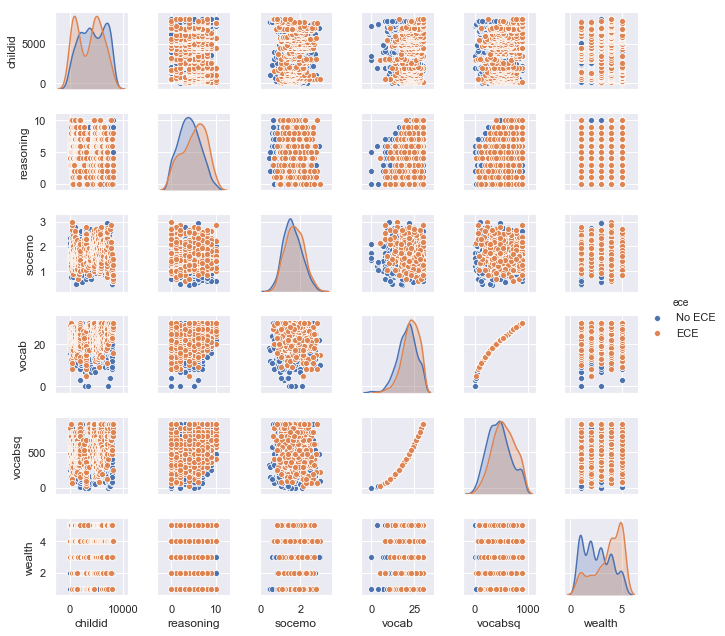

In [16]:
# visually check relations between numeric variables
grid = sns.pairplot(smallZambiaDF, hue="ece", height=defaultfigheight/6, kind='scatter')
# we have to use an explicit height per facet-figure here, since a grid of figures doesn't follow the matplotlib default size

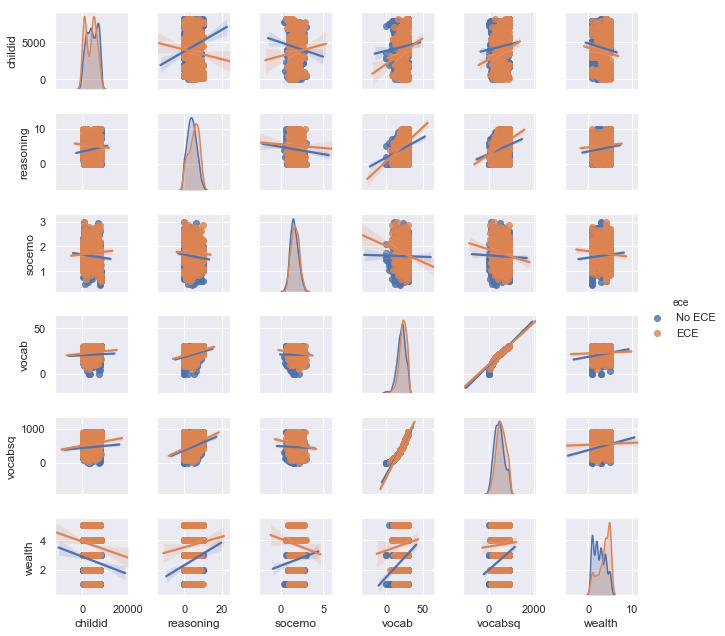

In [17]:
grid = sns.pairplot(smallZambiaDF, hue="ece", height=defaultfigheight/6, kind='reg') # linear regressions on top of scatter

C:\Users\sr876\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:1: FutureWarning: pandas.scatter_matrix is deprecated, use pandas.plotting.scatter_matrix instead
  """Entry point for launching an IPython kernel.


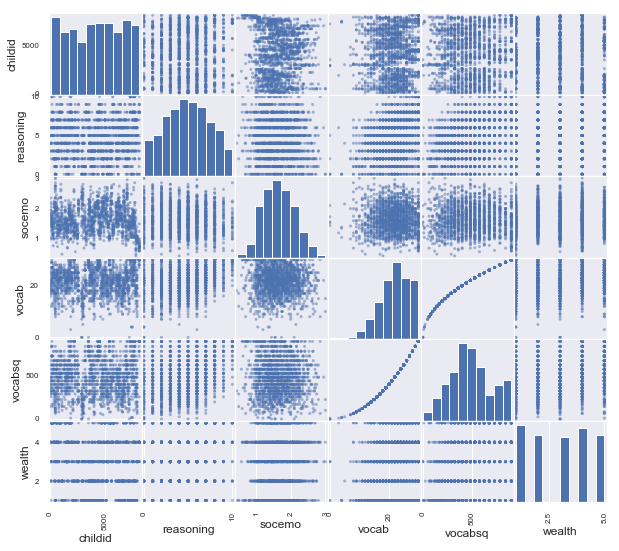

In [18]:
pd.scatter_matrix(smallZambiaDF)
plt.show()

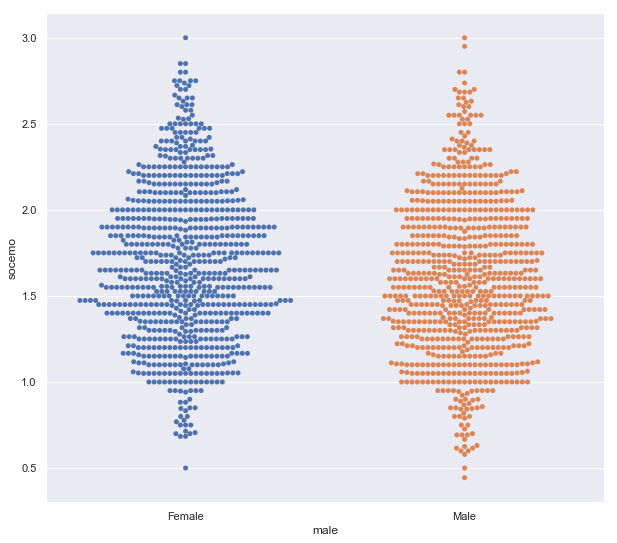

In [19]:
plt.figure()
sns.swarmplot(x="male", y="socemo", data=smallZambiaDF)
plt.show()

C:\Users\sr876\AppData\Local\Continuum\anaconda3\lib\site-packages\rpy2-2.9.4-py3.7-win-amd64.egg\rpy2\robjects\pandas2ri.py:191: FutureWarning: from_items is deprecated. Please use DataFrame.from_dict(dict(items), ...) instead. DataFrame.from_dict(OrderedDict(items)) may be used to preserve the key order.
  res = PandasDataFrame.from_items(items)


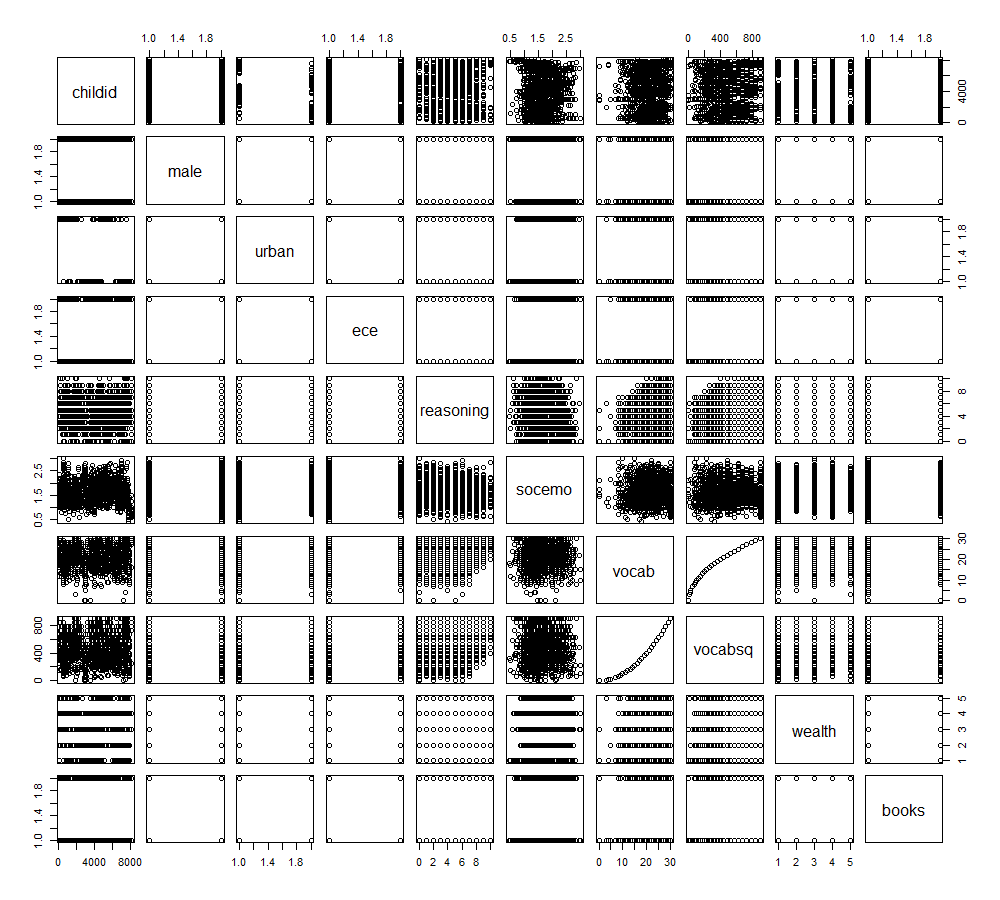

In [17]:
%%R -i smallZambiaDF
pairs(smallZambiaDF)

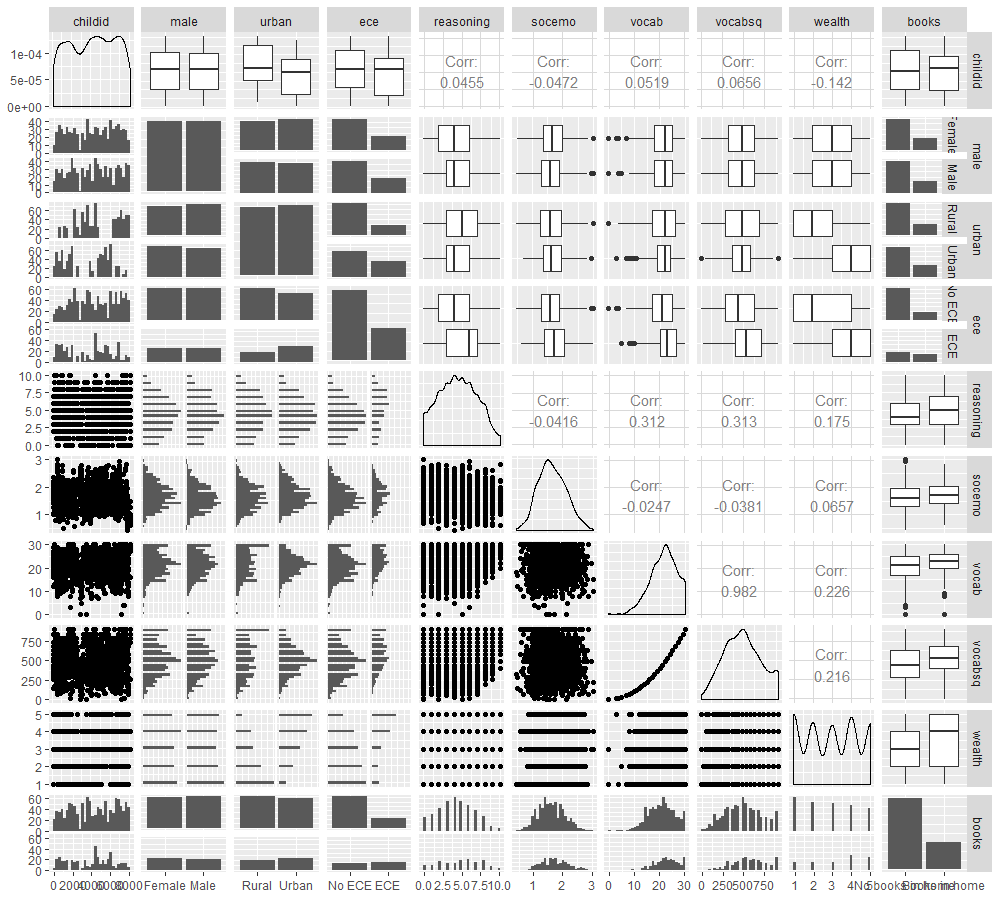

In [18]:
%%R -i smallZambiaDF
ggpairs(smallZambiaDF) # from library GGally

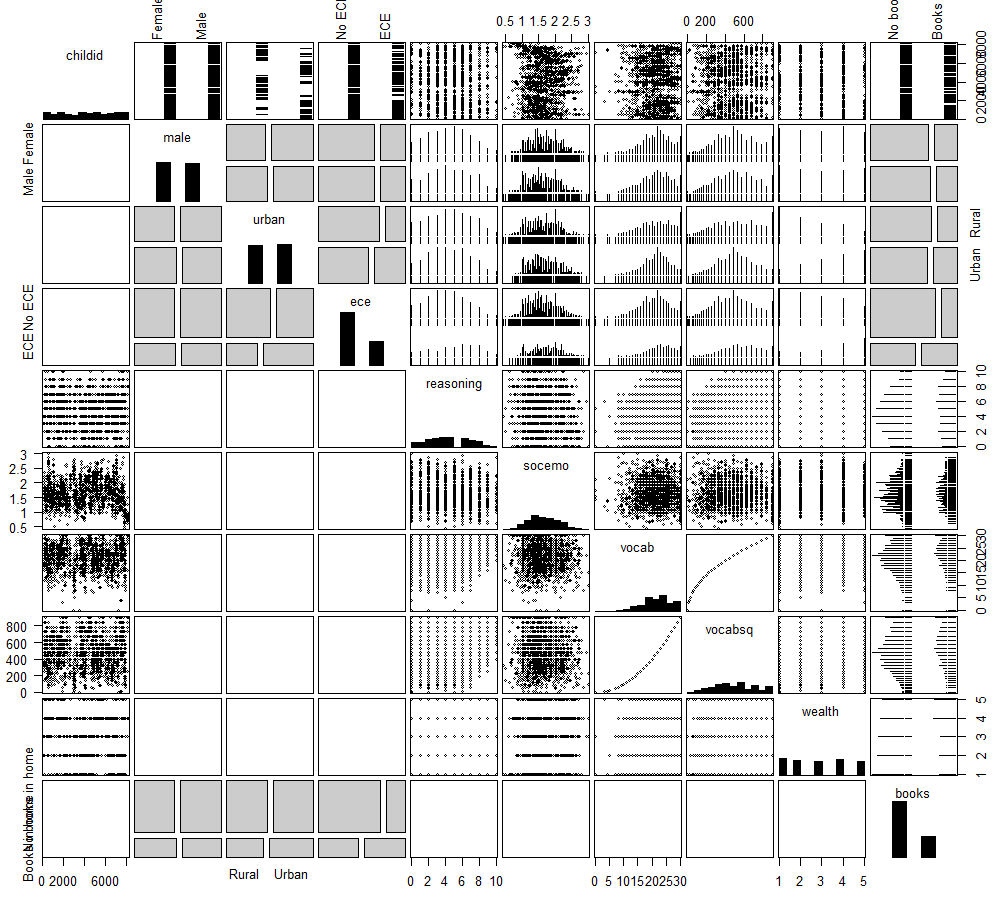

In [33]:
%%R -i smallZambiaDF
gpairs(smallZambiaDF) # from library gpairs

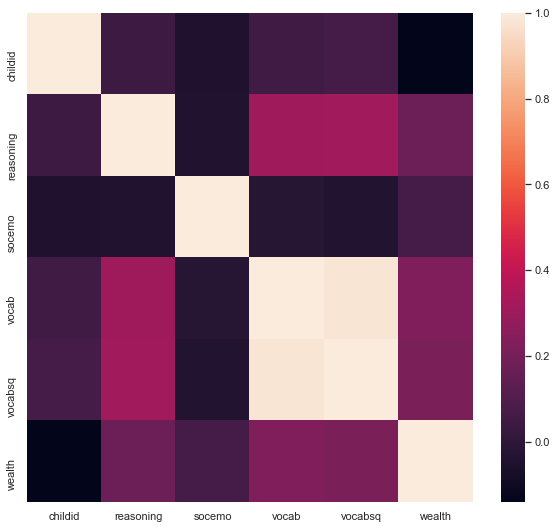

In [20]:
# Calculate correlations
corr = smallZambiaDF.corr()
# Heatmap
plt.figure()
sns.heatmap(corr)
plt.show()

To Do: implement an equivalent to `ggpairs` in python, similar to `scatter_matrix_all` found here: http://photo.etangkk.com/Python/blog-04.asp but using seaborn's PairGrid functionality.

What are our observed variables like? Continuous (e.g. age or height), ordinal (e.g. Likert items), or categorical (e.g. gender) or even dichotomous/binary (e.g. yes/no questions). Is validity (accurately captures the theoretical construct) and reliability (consistent results across time/rater/items) already established or just assumed?

## Data Cleanup and Checking Assumptions

SEM maximum likelihood estimator assumes normality of all endogenous variables, and implies they are continuous. But these assumptions can sometimes be relaxed.

TODO: how to check?

### Simple Regression

First, we do a simple regression. We can use `scikit-learn` (more oriented towards machine learning, less support for detailed statistics output) or `statsmodels` (more statistics oriented, with R-like interface) or R.

In [74]:
result = smf.ols(formula='socemo ~ ece', data=smallZambiaDF).fit()

In [25]:
print(result.params)

Intercept     1.613317
ece[T.ECE]    0.110536
dtype: float64


In [26]:
print(result.summary())

                            OLS Regression Results                            
Dep. Variable:                 socemo   R-squared:                       0.013
Model:                            OLS   Adj. R-squared:                  0.012
Method:                 Least Squares   F-statistic:                     21.06
Date:                Sun, 18 Nov 2018   Prob (F-statistic):           4.80e-06
Time:                        23:22:31   Log-Likelihood:                -993.01
No. Observations:                1613   AIC:                             1990.
Df Residuals:                    1611   BIC:                             2001.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      1.6133      0.013    119.945      0.0

In [75]:
fig = smg.regressionplots.abline_plot(model_results=result)
fig.axes[0].scatter(smallZambiaDF['ece'], smallZambiaDF['socemo'])

FigureCanvasNbAgg()

Since this is based on a categorical variable (ece), it is effectively a one-way ANOVA, so we can also print it as that.

In [27]:
table = sm.stats.anova_lm(result, typ=2) # Type 2 Anova DataFrame
print(table)

              sum_sq      df          F    PR(>F)
ece         4.229228     1.0  21.060384  0.000005
Residual  323.511946  1611.0        NaN       NaN


In [28]:
pd.get_dummies(smallZambiaDF, columns=['ece',]).head()

childid    male  urban  reasoning  socemo  vocab  vocabsq  wealth  \
0      101    Male  Urban        3.0    1.05   18.0    324.0     3.0   
1      102    Male  Urban        4.0    1.00   19.0    361.0     2.0   
2      103  Female  Urban        4.0    1.80   19.0    361.0     3.0   
3      104    Male  Urban        5.0    2.35   12.0    144.0     3.0   
4      105    Male  Urban        5.0    1.50   25.0    625.0     2.0   

              books  ece_No ECE  ece_ECE  
0  No books in home           0        1  
1  No books in home           1        0  
2  No books in home           1        0  
3  No books in home           1        0  
4     Books in home           1        0

In [30]:
smallZambiaDF['ece'].str.get_dummies()['ECE'].head()

0    1
1    0
2    0
3    0
4    0
Name: ECE, dtype: int64

In [31]:
smallZambiaDF['socemo'].shape, smallZambiaDF['ece'].str.get_dummies()[['ECE']].shape

((1613,), (1613, 1))

In [32]:
linreg = sklearn.linear_model.LinearRegression()
linreg.fit(smallZambiaDF['ece'].str.get_dummies()[['ECE']], smallZambiaDF['socemo'])

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

In [33]:
print(linreg.intercept_, linreg.coef_)

1.613316750660673 [0.11053562]


In [61]:
sns.lmplot(x='ece_ECE', y='socemo', data=pd.get_dummies(smallZambiaDF), height=defaultfigheight)

FigureCanvasNbAgg()

In [62]:
f = plt.figure()
residaxes = sns.residplot(x='ece_ECE', y='socemo', data=pd.get_dummies(smallZambiaDF))

FigureCanvasNbAgg()

Calculating and plotting the simple linear model with R:

In [30]:
%%R -i smallZambiaDF
model = lm(socemo ~ ece, data = smallZambiaDF)
summary(model)


Call:
lm(formula = socemo ~ ece, data = smallZambiaDF)

Residuals:
     Min       1Q   Median       3Q      Max 
-1.16887 -0.32385 -0.02385  0.32615  1.38668 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)    
(Intercept)  1.66858    0.01204 138.551  < 2e-16 ***
ece.L        0.07816    0.01703   4.589  4.8e-06 ***
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Residual standard error: 0.4481 on 1611 degrees of freedom
Multiple R-squared:  0.0129,	Adjusted R-squared:  0.01229 
F-statistic: 21.06 on 1 and 1611 DF,  p-value: 4.795e-06



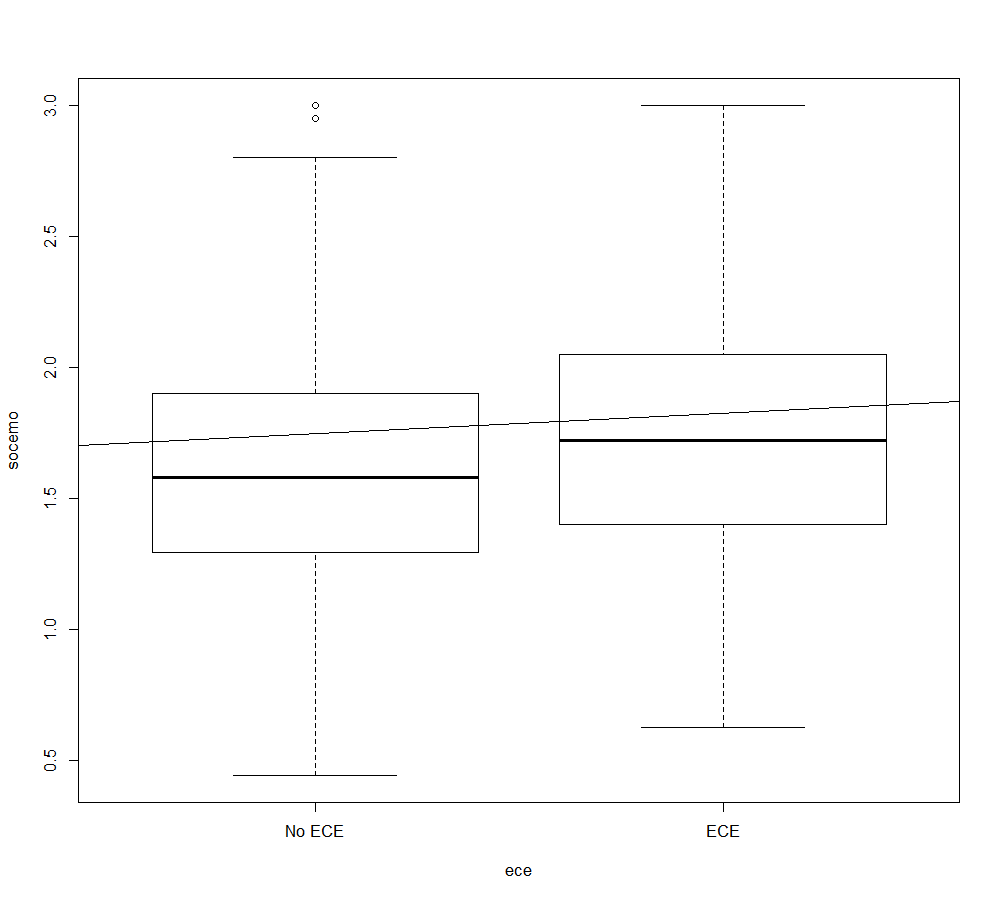

In [39]:
%%R -i smallZambiaDF
plot(socemo ~ ece, data = smallZambiaDF)
abline(model)

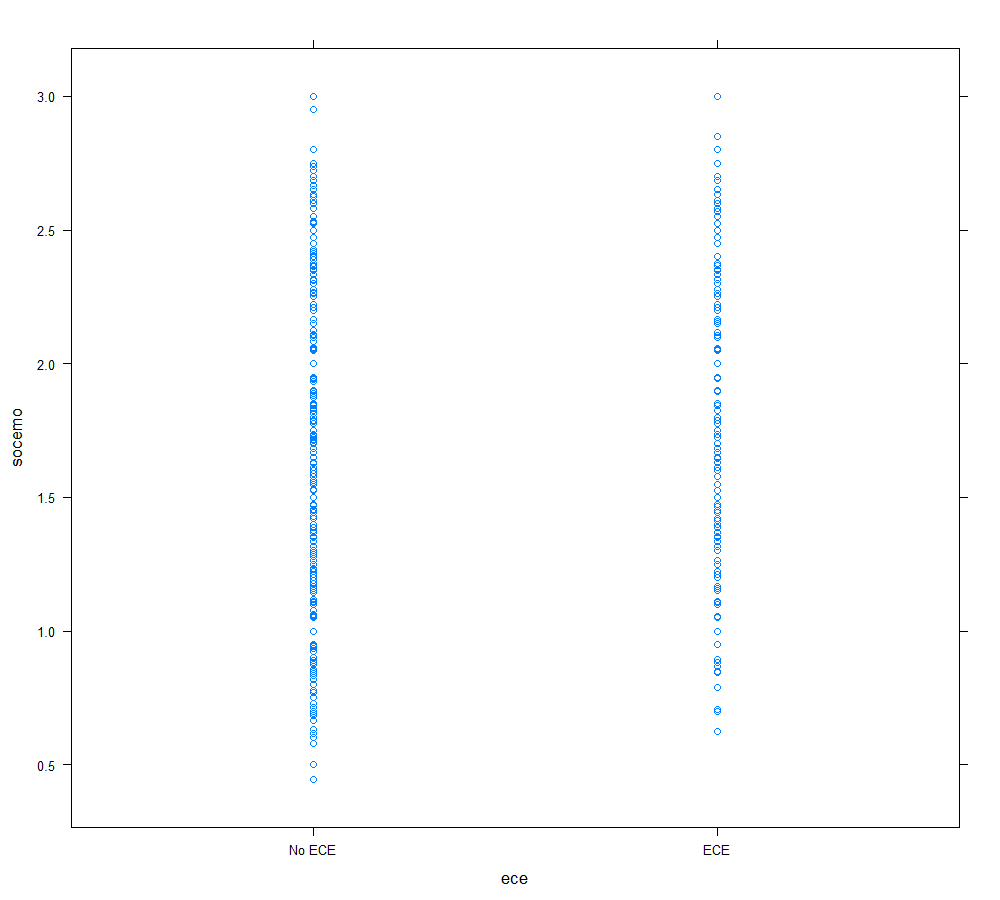

In [40]:
%%R -i smallZambiaDF
xyplot(socemo ~ ece, data = smallZambiaDF)

## Setting up the Model for SEM

For comparison let's use SEM to run the same linear regression model as above.

In [121]:
%%R -i smallZambiaDF
semfit <- sem('socemo ~ reasoning', data=smallZambiaDF, meanstructure=TRUE)
summary(semfit)

lavaan 0.6-2 ended normally after 11 iterations

  Optimization method                           NLMINB
  Number of free parameters                          3

  Number of observations                          1613

  Estimator                                         ML
  Model Fit Test Statistic                       0.000
  Degrees of freedom                                 0

Parameter Estimates:

  Information                                 Expected
  Information saturated (h1) model          Structured
  Standard Errors                             Standard

Regressions:
                   Estimate  Std.Err  z-value  P(>|z|)
  socemo ~                                            
    reasoning        -0.007    0.004   -1.672    0.094

Intercepts:
                   Estimate  Std.Err  z-value  P(>|z|)
   .socemo            1.681    0.023   73.853    0.000

Variances:
                   Estimate  Std.Err  z-value  P(>|z|)
   .socemo            0.203    0.007   28.399    0.000



In [22]:
dummiedSmallZambiaDF = pd.get_dummies(smallZambiaDF, dtype=np.int8)
# We use int8 instead of uint8 for the dummy variables, because R has no unsigned integers,
# so we would get warnings when passing these new variables into R.
# Further: the new dummy columns use the actual value as part of the column name,
# and therefore might have spaces in the column name.
# this is not great for specifying models, so let us replace the spaces with underscores:
dummiedSmallZambiaDF.columns = dummiedSmallZambiaDF.columns.str.replace(' ', '_')

In [122]:
%%R -i dummiedSmallZambiaDF
semfit <- sem('socemo ~ ece_ECE', data=dummiedSmallZambiaDF, meanstructure=TRUE)
summary(semfit, standardized=TRUE)

lavaan 0.6-2 ended normally after 13 iterations

  Optimization method                           NLMINB
  Number of free parameters                          3

  Number of observations                          1613

  Estimator                                         ML
  Model Fit Test Statistic                       0.000
  Degrees of freedom                                 0
  Minimum Function Value               0.0000000000000

Parameter Estimates:

  Information                                 Expected
  Information saturated (h1) model          Structured
  Standard Errors                             Standard

Regressions:
                   Estimate  Std.Err  z-value  P(>|z|)   Std.lv  Std.all
  socemo ~                                                              
    ece_ECE           0.111    0.024    4.592    0.000    0.111    0.114

Intercepts:
                   Estimate  Std.Err  z-value  P(>|z|)   Std.lv  Std.all
   .socemo            1.613    0.013  120.020    0.000   

In [125]:
%%R -i dummiedSmallZambiaDF
semfit <- sem('socemo ~ ece_ECE', data=dummiedSmallZambiaDF, estimator='MLMV', meanstructure=TRUE)
summary(semfit, standardized=TRUE)

lavaan 0.6-2 ended normally after 13 iterations

  Optimization method                           NLMINB
  Number of free parameters                          3

  Number of observations                          1613

  Estimator                                         ML      Robust
  Model Fit Test Statistic                       0.000       0.000
  Degrees of freedom                                 0           0
  Minimum Function Value               0.0000000000000
  Scaling correction factor                                     NA
  Shift parameter                                     
    for simple second-order correction (Mplus variant)

Parameter Estimates:

  Information                                 Expected
  Information saturated (h1) model          Structured
  Standard Errors                           Robust.sem

Regressions:
                   Estimate  Std.Err  z-value  P(>|z|)   Std.lv  Std.all
  socemo ~                                                              
   

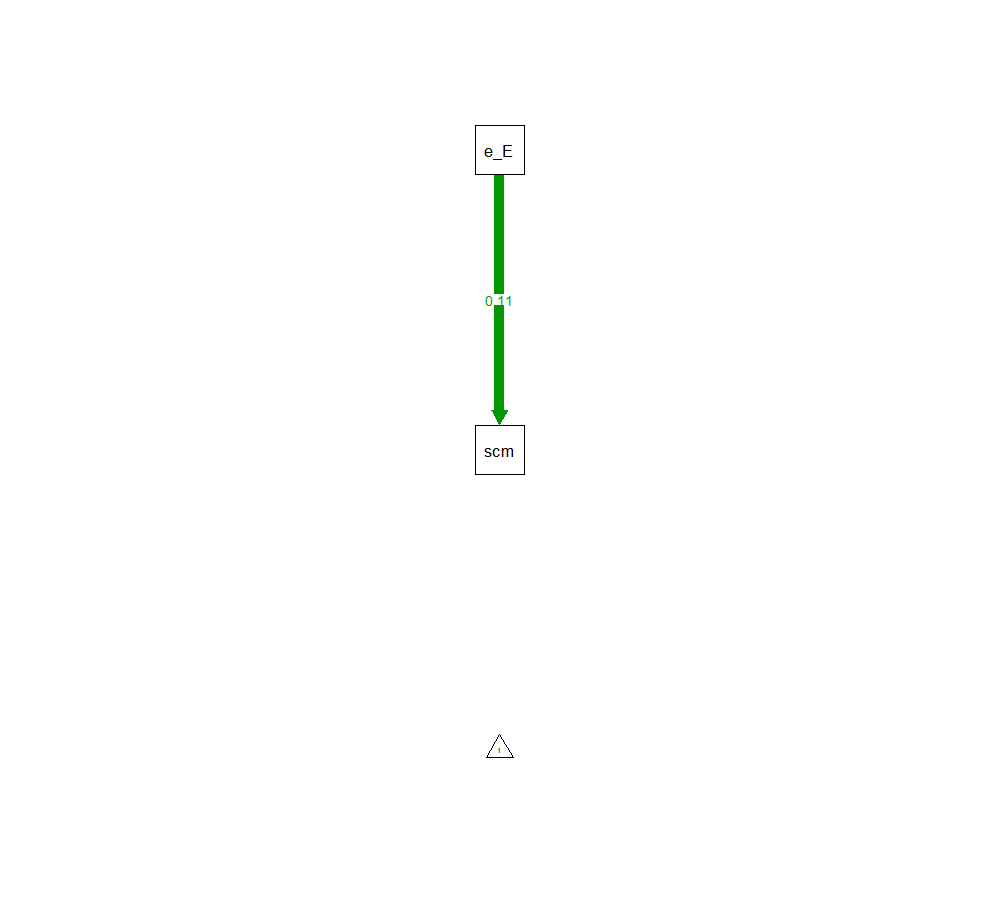

In [84]:
%%R -i dummiedSmallZambiaDF
semPaths(lm('socemo ~ ece_ECE', data=dummiedSmallZambiaDF), "std")

In [23]:
%%R -i dummiedSmallZambiaDF
bigmodel <- '
  socemo ~ ece_ECE + wealth
  reasoning ~ ece_ECE + wealth + books_Books_in_home
  socemo ~~ reasoning
'
semfit <- sem(bigmodel, data=dummiedSmallZambiaDF, estimator="MLMV", meanstructure=TRUE)
summary(semfit, standardized=TRUE)

C:\Users\sr876\AppData\Local\Continuum\anaconda3\lib\site-packages\rpy2-2.9.4-py3.7-win-amd64.egg\rpy2\robjects\pandas2ri.py:191: FutureWarning: from_items is deprecated. Please use DataFrame.from_dict(dict(items), ...) instead. DataFrame.from_dict(OrderedDict(items)) may be used to preserve the key order.
  res = PandasDataFrame.from_items(items)


lavaan 0.6-2 ended normally after 31 iterations

  Optimization method                           NLMINB
  Number of free parameters                         10

  Number of observations                          1613

  Estimator                                         ML      Robust
  Model Fit Test Statistic                       6.390       6.305
  Degrees of freedom                                 1           1
  P-value (Chi-square)                           0.011       0.012
  Scaling correction factor                                  1.014
  Shift parameter                                           -0.000
    for simple second-order correction (Mplus variant)

Parameter Estimates:

  Information                                 Expected
  Information saturated (h1) model          Structured
  Standard Errors                           Robust.sem

Regressions:
                   Estimate  Std.Err  z-value  P(>|z|)   Std.lv  Std.all
  socemo ~                                          

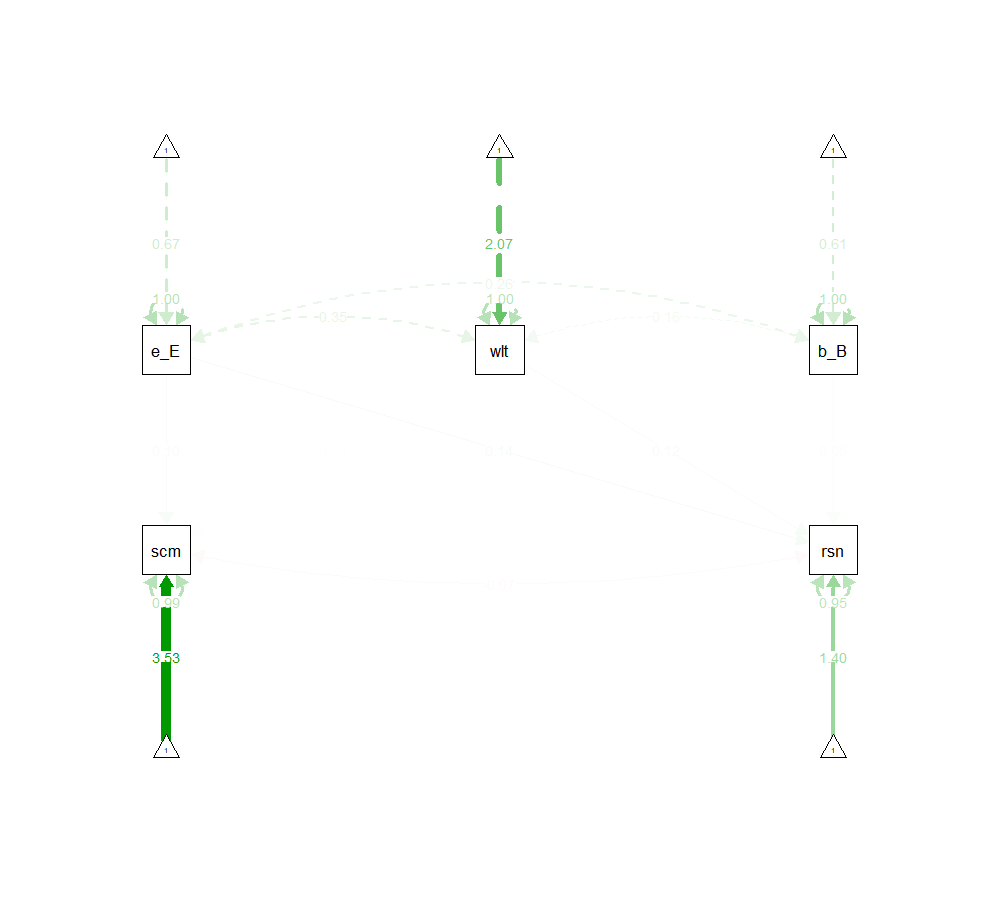

In [129]:
%%R
semPaths(semfit, "std")

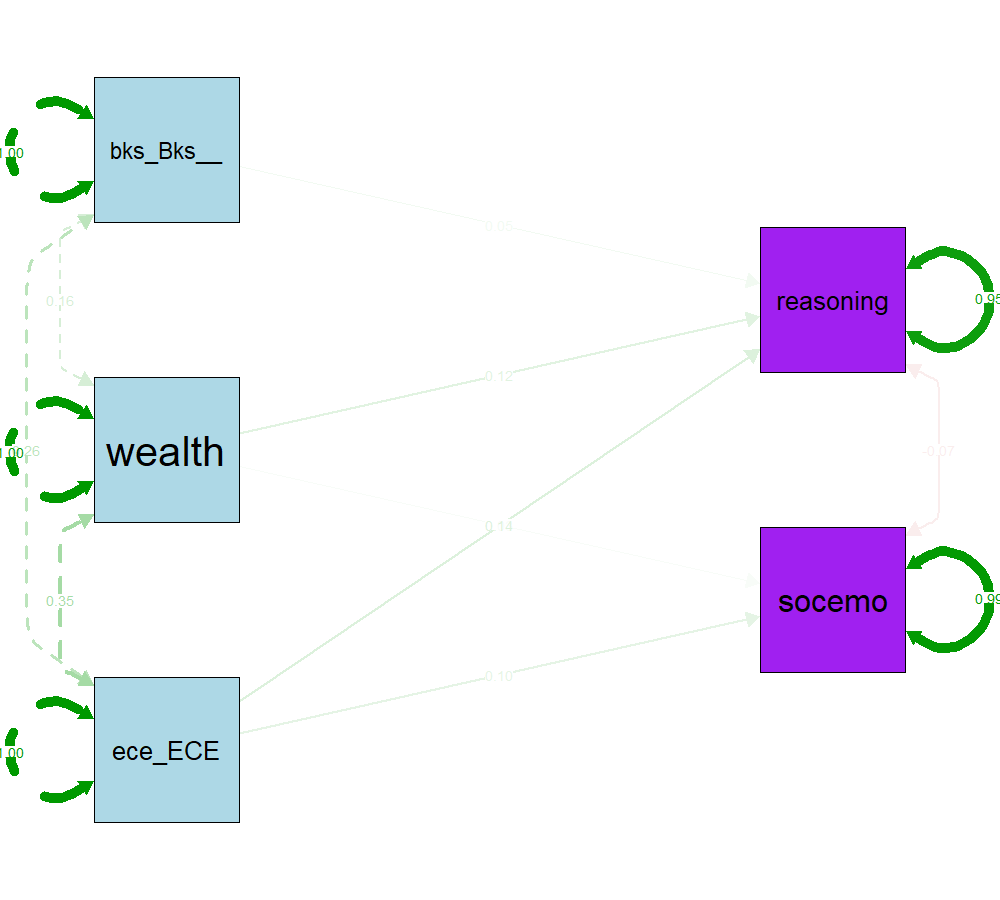

In [25]:
%%R
semPaths(semfit, "std", curvePivot=TRUE, intercepts=FALSE, layout="tree2", rotation=2, nCharNodes=9, sizeMan=15,
         groups=list(c("wealth", "ece_ECE", "books_Books_in_home"), c("reasoning", "socemo")),
         color=c("lightblue", "purple"))

In [90]:
%%R
fitMeasures(semfit)

                         npar                          fmin 
                        8.000                         0.002 
                        chisq                            df 
                        6.390                         1.000 
                       pvalue                  chisq.scaled 
                        0.011                         6.305 
                    df.scaled                 pvalue.scaled 
                        1.000                         0.012 
         chisq.scaling.factor                baseline.chisq 
                        1.014                       123.037 
                  baseline.df               baseline.pvalue 
                        7.000                         0.000 
        baseline.chisq.scaled            baseline.df.scaled 
                      120.437                         7.000 
       baseline.pvalue.scaled baseline.chisq.scaling.factor 
                        0.000                         1.023 
                        

In [91]:
%%R
fitMeasures(semfit, c("cfi", "tli", "rmsea", "srmr"))

  cfi   tli rmsea  srmr 
0.954 0.675 0.058 0.016 


Now let's try to do the same with OpenMX. Here, we need to first drop variables that we are not actually using in the model, otherwise OpenMX will complain.

In [107]:
smallZambiaDFForOMX = dummiedSmallZambiaDF[["wealth", "ece_ECE", "books_Books_in_home", "reasoning", "socemo"]]

In [168]:
%%R -i smallZambiaDFForOMX
manifests <- names(smallZambiaDFForOMX)
model <- mxModel("zambia simple", type="RAM",
                manifestVars=manifests,
                mxPath(from=c("wealth", "ece_ECE"), to="socemo", arrows=1, free=TRUE),
                mxPath(from=c("wealth", "ece_ECE", "books_Books_in_home"), to="reasoning", arrows=1, free=TRUE),
                mxPath(from="socemo", to="reasoning", arrows=2),
                mxPath(from=manifests, arrows=2, values=.8), # needs starting values or it won't converge
                mxPath(from="one", to=manifests),
                mxData(observed=smallZambiaDFForOMX, type="raw"))
model

MxModel 'zambia simple' 
type : RAM 
$matrices : 'A', 'S', 'F', and 'M' 
$algebras : NULL 
$constraints : NULL 
$intervals : NULL 
$latentVars : none
$manifestVars : 'wealth', 'ece_ECE', 'books_Books_in_home', 'reasoning', and 'socemo' 
$data : 1613 x 5 
$data means : NA
$data type: 'raw' 
$submodels : NULL 
$expectation : MxExpectationRAM 
$fitfunction : MxFitFunctionML 
$compute : NULL 
$independent : FALSE 
$options :  
$output : FALSE 


In [169]:
%%R
modelRun <- mxRun(model)

In [172]:
%%R
mxCheckIdentification(model)

$status
[1] TRUE

$jacobian
       zambia simple.A[4,1] zambia simple.A[5,1] zambia simple.A[4,2]
cov1_1                  0.0                  0.0                  0.0
cov2_1                  0.0                  0.0                  0.0
cov3_1                  0.0                  0.0                  0.0
cov4_1                  0.8                  0.0                  0.0
cov5_1                  0.0                  0.8                  0.0
cov2_2                  0.0                  0.0                  0.0
cov3_2                  0.0                  0.0                  0.0
cov4_2                  0.0                  0.0                  0.8
cov5_2                  0.0                  0.0                  0.0
cov3_3                  0.0                  0.0                  0.0
cov4_3                  0.0                  0.0                  0.0
cov5_3                  0.0                  0.0                  0.0
cov4_4                  0.0                  0.0              

In [171]:
%%R
summary(modelRun)

Summary of zambia simple 
 
free parameters:
                   name matrix                 row                 col
1  zambia simple.A[4,1]      A           reasoning              wealth
2  zambia simple.A[5,1]      A              socemo              wealth
3  zambia simple.A[4,2]      A           reasoning             ece_ECE
4  zambia simple.A[5,2]      A              socemo             ece_ECE
5  zambia simple.A[4,3]      A           reasoning books_Books_in_home
6  zambia simple.S[1,1]      S              wealth              wealth
7  zambia simple.S[2,2]      S             ece_ECE             ece_ECE
8  zambia simple.S[3,3]      S books_Books_in_home books_Books_in_home
9  zambia simple.S[4,4]      S           reasoning           reasoning
10 zambia simple.S[4,5]      S           reasoning              socemo
11 zambia simple.S[5,5]      S              socemo              socemo
12 zambia simple.M[1,1]      M                   1              wealth
13 zambia simple.M[1,2]      M  

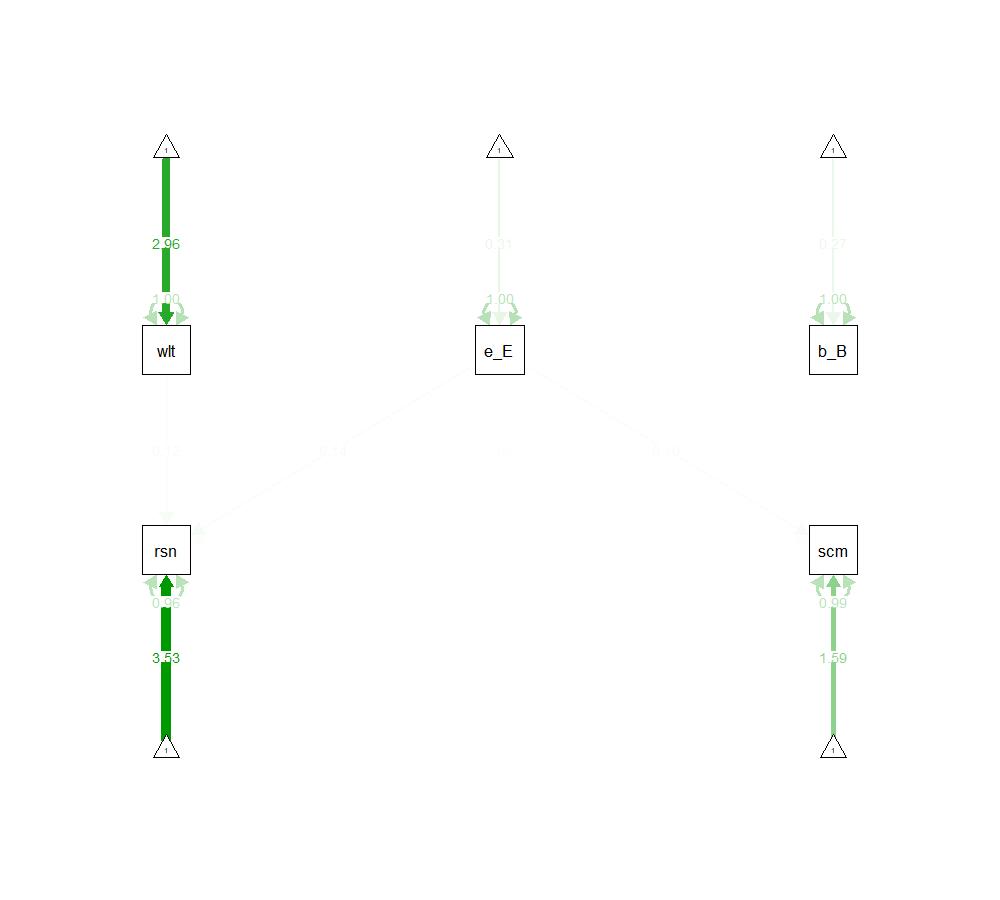

In [114]:
%%R
semPaths(modelRun, "std")

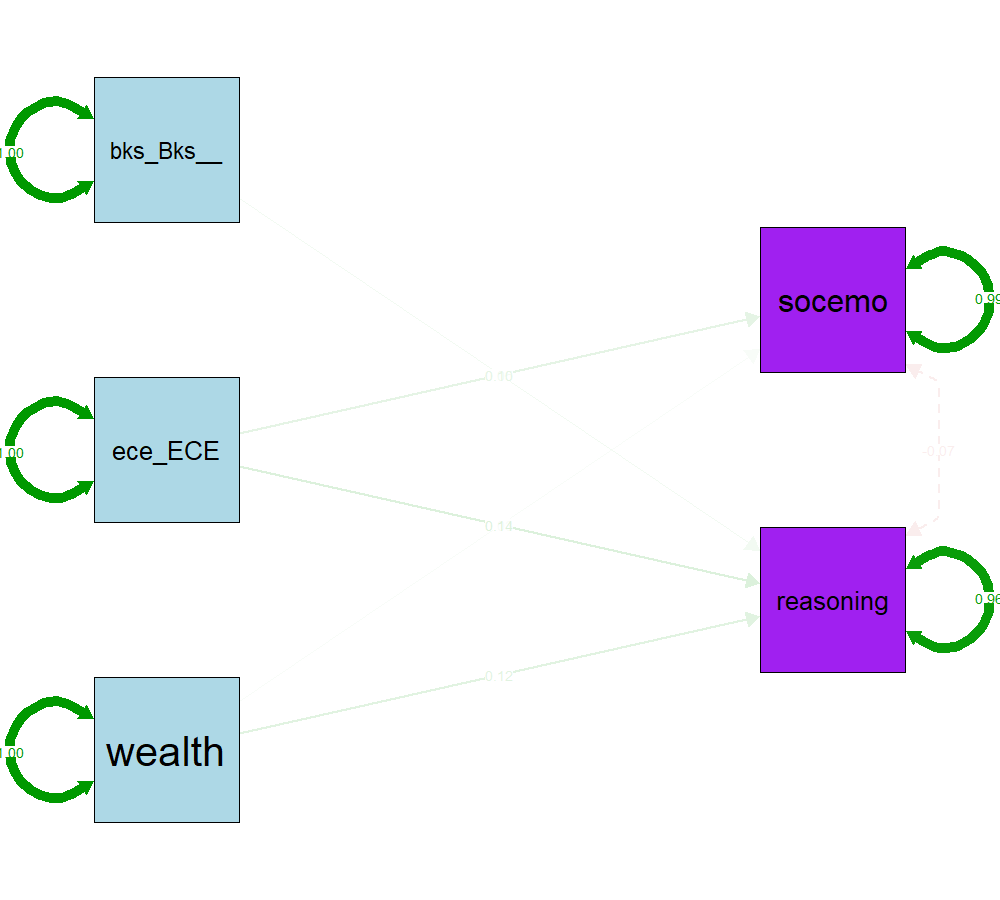

In [173]:
%%R
semPaths(modelRun, "std", curvePivot=TRUE, intercepts=FALSE, layout="tree2", rotation=2, nCharNodes=9, sizeMan=15,
         groups=list(c("wealth", "ece_ECE", "books_Books_in_home"), c("reasoning", "socemo")),
         color=c("lightblue", "purple"))

There's also another package for doing SEM in R, calles `sem`, but it seems older and less well supported/documented.

### A more complex model

Research Question: Do ECE participation and book availability fully explain the relations between wealth and children's socio-emotional & reasoning skills in the Zambian context?

In [196]:
%%R -i dummiedSmallZambiaDF
biggermodel <- '
  ece_ECE ~ wealth
  books_Books_in_home ~ wealth
  socemo ~ ece_ECE + books_Books_in_home
  reasoning ~ ece_ECE + books_Books_in_home
  socemo ~~ reasoning
'
semfit2 <- sem(biggermodel, data=dummiedSmallZambiaDF, estimator="MLR", meanstructure=TRUE)
# WLS would correspond to the adf method, but does not run to completion with this dataset
summary(semfit2, standardized=TRUE)

lavaan 0.6-2 ended normally after 35 iterations

  Optimization method                           NLMINB
  Number of free parameters                         15

  Number of observations                          1613

  Estimator                                         ML      Robust
  Model Fit Test Statistic                     105.787      98.505
  Degrees of freedom                                 3           3
  P-value (Chi-square)                           0.000       0.000
  Scaling correction factor                                  1.074
    for the Yuan-Bentler correction (Mplus variant)

Parameter Estimates:

  Information                                 Observed
  Observed information based on                Hessian
  Standard Errors                   Robust.huber.white

Regressions:
                        Estimate  Std.Err  z-value  P(>|z|)   Std.lv  Std.all
  ece_ECE ~                                                                  
    wealth                 0.114    0.0

In [183]:
%%R
fitMeasures(semfit2, c("cfi", "tli", "rmsea", "srmr"))

  cfi   tli rmsea  srmr 
0.882 0.608 0.110 0.046 


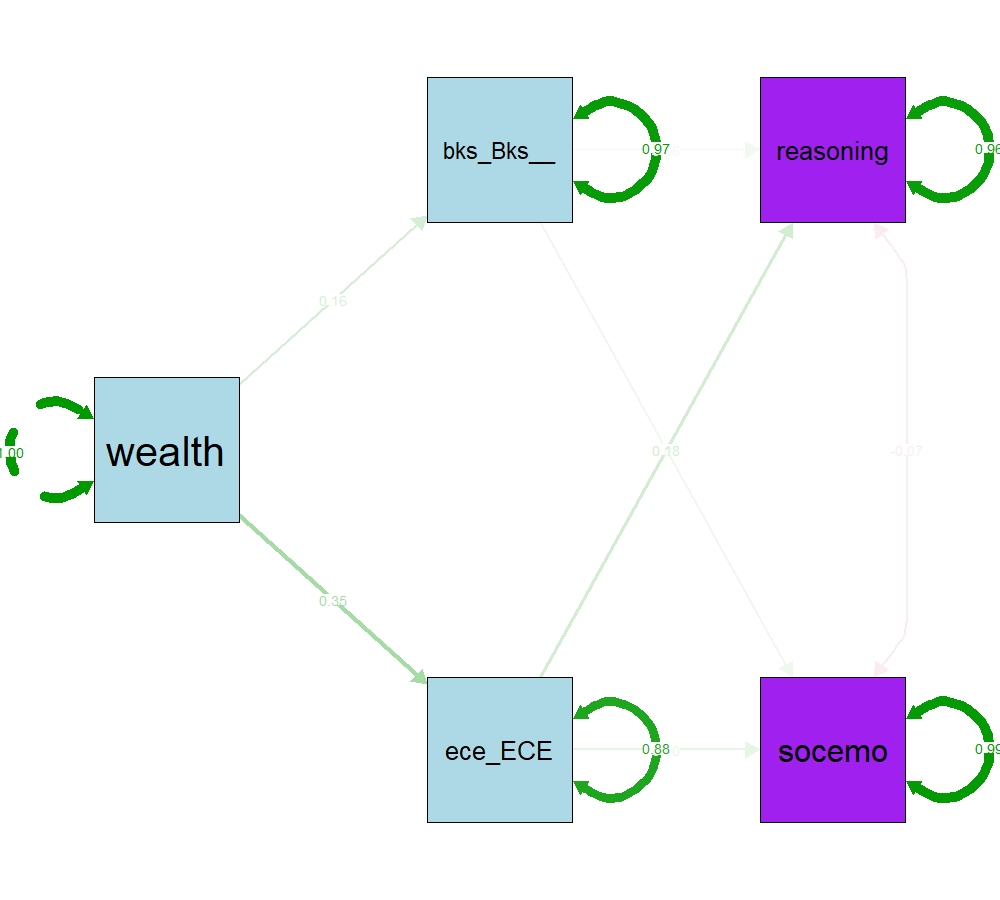

In [179]:
%%R
semPaths(semfit2, "std", curvePivot=TRUE, intercepts=FALSE, layout="tree2", rotation=2, nCharNodes=9, sizeMan=15,
         groups=list(c("wealth", "ece_ECE", "books_Books_in_home"), c("reasoning", "socemo")),
         color=c("lightblue", "purple"))

### High-level tools for SEM in R

simsem's semtools, see https://github.com/simsem/semTools/wiki/Functions

In [119]:
%%R
chisqSmallN(semfit)

naive.chisq    k-factor   adj.chisq          df      pvalue 
      0.000       0.999       0.000       0.000       1.000 


bigsem, ctsem, gsem, lavaan.survey, regsem, semdiag

## Model Fit

A caveat regarding fit measures: similar to the arbitraty cutoff for p-values indicating significance, the use of fit indices is controversial.

Usual indices:

* chisquare, basic but can be unclear
* RMSEA (root mean square error of approximation) based on chisquare but takes degrees of freedom (model parsimony) and sample size into account. Should be close to 0 ( < 0.05-0.08)
* CFI/TLI (Bentler comparative fit index, Tucker Lewis index) measure relative fit vs an "independence model" (with covariances 0). Should be close to 1 ( > 0.90-0.95)
* SRMR (standardized root mean square residual) measures the difference between observed and predicted correlations. Should be close to 0 ( < 0.06-0.08)

In [148]:
%%R
fitMeasures(semfit, c("cfi", "tli", "rmsea", "srmr"))

  cfi   tli rmsea  srmr 
0.954 0.675 0.058 0.013 


## Latent Variables and Mediation

A simpler model to show mediation.

In [200]:
%%R -i dummiedSmallZambiaDF
simplermodel <- '
  # Here we use a and b and c to keep track of the parameter estimations,
  # so that we can then use it to estimate the indirect and total effects.
  # ece is the supposed Mediator
  ece_ECE ~ a*wealth
  socemo ~ c*wealth + b*ece_ECE
  # also estimate indirect effect:
  indirect := a*b
  # total effect:
  total := c + (a*b)
'
semfit3 <- sem(simplermodel, data=dummiedSmallZambiaDF, estimator="MLR", meanstructure=TRUE)
summary(semfit3, standardized=TRUE)

lavaan 0.6-2 ended normally after 21 iterations

  Optimization method                           NLMINB
  Number of free parameters                          7

  Number of observations                          1613

  Estimator                                         ML      Robust
  Model Fit Test Statistic                       0.000       0.000
  Degrees of freedom                                 0           0
  Minimum Function Value               0.0000000000000
  Scaling correction factor                                     NA
    for the Yuan-Bentler correction (Mplus variant)

Parameter Estimates:

  Information                                 Observed
  Observed information based on                Hessian
  Standard Errors                   Robust.huber.white

Regressions:
                   Estimate  Std.Err  z-value  P(>|z|)   Std.lv  Std.all
  ece_ECE ~                                                             
    wealth     (a)    0.114    0.008   14.928    0.000    0.1

In [201]:
%%R
fitMeasures(semfit3, c("cfi", "tli", "rmsea", "srmr"))

  cfi   tli rmsea  srmr 
    1     1     0     0 


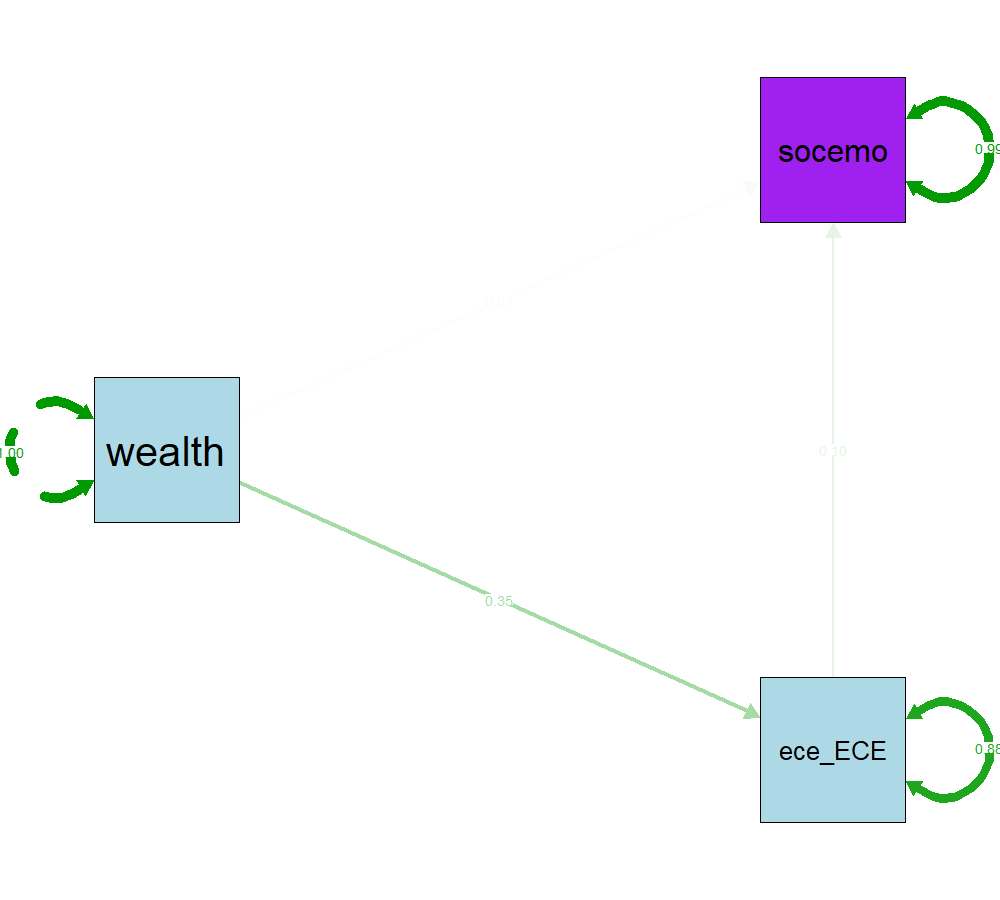

In [202]:
%%R
semPaths(semfit3, "std", curvePivot=TRUE, intercepts=FALSE, layout="tree2", rotation=2, nCharNodes=9, sizeMan=15,
         groups=list(c("wealth", "ece_ECE"), c("socemo")),
         color=c("lightblue", "purple"))

Other packages that should be useful for mediation analysis, for example to compare results: `psych` and `MBESS`, see here http://nickmichalak.com/blog_entries/2018/nrg01/nrg01.html

### Comparing two different models

The semtools package is helpful for this.

In [206]:
%%R -i dummiedSmallZambiaDF
twostagesemfit1 <- sem.2stage(model=biggermodel, data=dummiedSmallZambiaDF, estimator="MLR", meanstructure=TRUE)
summary(twostagesemfit1, standardized=TRUE)

Chi-squared test(s) results, ADJUSTED for missing data:

Browne (1984) residual-based test statistic:

 chisq     df pvalue 
97.915  3.000  0.000 


Satorra-Bentler (2001) scaled test statistic:

   chisq.naive scaling.factor   chisq.scaled             df         pvalue 
       105.787          0.001     178767.164          3.000          0.000 


Chi-squared test results, UNADJUSTED for missing data:

lavaan 0.6-2 ended normally after 35 iterations

  Optimization method                           NLMINB
  Number of free parameters                         17

  Number of observations                          1613

  Estimator                                         ML
  Model Fit Test Statistic                     105.787
  Degrees of freedom                                 3
  P-value (Chi-square)                           0.000


Parameter Estimates, with SEs (and tests/CIs) ADJUSTED for missing data:

                   lhs op                 rhs    est    se       z pvalue
1       

In [207]:
%%R -i dummiedSmallZambiaDF
biggerermodel <- '
  ece_ECE ~ wealth
  books_Books_in_home ~ wealth
  socemo ~ wealth + ece_ECE + books_Books_in_home
  reasoning ~ wealth + ece_ECE + books_Books_in_home
  socemo ~~ reasoning
'
twostagesemfit2 <- sem.2stage(model=biggerermodel, data=dummiedSmallZambiaDF, estimator="MLR", meanstructure=TRUE)
summary(twostagesemfit2, standardized=TRUE)

Chi-squared test(s) results, ADJUSTED for missing data:

Browne (1984) residual-based test statistic:

 chisq     df pvalue 
77.505  1.000  0.000 


Satorra-Bentler (2001) scaled test statistic:

   chisq.naive scaling.factor   chisq.scaled             df         pvalue 
        83.543          0.001     160732.251          1.000          0.000 


Chi-squared test results, UNADJUSTED for missing data:

lavaan 0.6-2 ended normally after 38 iterations

  Optimization method                           NLMINB
  Number of free parameters                         19

  Number of observations                          1613

  Estimator                                         ML
  Model Fit Test Statistic                      83.543
  Degrees of freedom                                 1
  P-value (Chi-square)                           0.000


Parameter Estimates, with SEs (and tests/CIs) ADJUSTED for missing data:

                   lhs op                 rhs    est    se      z pvalue
1        

In [209]:
%%R
anova(twostagesemfit1, twostagesemfit2) # equivalent to "likelihood-ratio test"

Difference test for Browne (1984) residual-based statistics:

 chisq     df pvalue 
20.411  2.000  0.000 


Satorra-Bentler (2001) scaled difference test:

   chisq.naive scaling.factor   chisq.scaled             DF         pvalue 
        22.244          0.001      35434.111          2.000          0.000 


In [210]:
%%R
miPowerFit(semfit2)

                   lhs op                 rhs group
12              wealth ~~              wealth     1
18             ece_ECE ~~ books_Books_in_home     1
19             ece_ECE ~~              socemo     1
20             ece_ECE ~~           reasoning     1
21 books_Books_in_home ~~              socemo     1
22 books_Books_in_home ~~           reasoning     1
23             ece_ECE  ~ books_Books_in_home     1
24             ece_ECE  ~              socemo     1
25             ece_ECE  ~           reasoning     1
26 books_Books_in_home  ~             ece_ECE     1
27 books_Books_in_home  ~              socemo     1
28 books_Books_in_home  ~           reasoning     1
30              socemo  ~              wealth     1
32           reasoning  ~              wealth     1
33              wealth  ~             ece_ECE     1
34              wealth  ~ books_Books_in_home     1
35              wealth  ~              socemo     1
36              wealth  ~           reasoning     1
            

### Multi-group analysis

Compare a model across groups in the data, for example male vs. female. See http://lavaan.ugent.be/tutorial/groups.html for how to specify path constraints across groups.

In [212]:
%%R -i dummiedSmallZambiaDF
multigroupsemfit <- sem(model=biggermodel, data=dummiedSmallZambiaDF, estimator="MLR", meanstructure=TRUE,
                        group="male_Male")
summary(multigroupsemfit, standardized=TRUE)

lavaan 0.6-2 ended normally after 66 iterations

  Optimization method                           NLMINB
  Number of free parameters                         30

  Number of observations per group         
  1                                                803
  0                                                810

  Estimator                                         ML      Robust
  Model Fit Test Statistic                     112.355     104.373
  Degrees of freedom                                 6           6
  P-value (Chi-square)                           0.000       0.000
  Scaling correction factor                                  1.076
    for the Yuan-Bentler correction (Mplus variant)

Chi-square for each group:

  1                                             70.945      65.905
  0                                             41.410      38.468

Parameter Estimates:

  Information                                 Observed
  Observed information based on                Hessian
  

## Measurement Models, Confirmatory Factor Analysis

SEM can be used not only to relate measured variables, as above, but also to relate indicators (items, or full "scales" that combine items) to theorized "latent" variables that cannot be directly observed.

We use the extended version of the zambia dataset here which includes several more variables that are directly observed items. Initially, we'll use 5 items each for a socioemotional scale and a task-orientation scale. Each item is rated on a scale from 1 (never) to 4 (always).

In [215]:
measureZambiaDF.head()

childid    male  urban               reas1               reas2  \
0      101    Male  Urban  Correctly answered  Correctly answered   
1      102    Male  Urban  Correctly answered           Incorrect   
2      103  Female  Urban  Correctly answered  Correctly answered   
3      104    Male  Urban  Correctly answered  Correctly answered   
4      105    Male  Urban  Correctly answered  Correctly answered   

                reas3               reas4      reas5               reas6  \
0  Correctly answered           Incorrect  Incorrect           Incorrect   
1  Correctly answered  Correctly answered  Incorrect           Incorrect   
2  Correctly answered           Incorrect  Incorrect  Correctly answered   
3  Correctly answered           Incorrect  Incorrect           Incorrect   
4  Correctly answered           Incorrect  Incorrect  Correctly answered   

                reas7        ...        to12 to13     ece reasoning socemo  \
0           Incorrect        ...         2.0  4.0     ECE       3.0   1.05   
1  Correctly answered        ...         4.0  4.0  No ECE       4.0   1.00   
2           Incorrect        ...         4.0  4.0  No ECE       4.0   1.80   
3  Correctly answered        ...         4.0  3.0  No ECE       5.0   2.35   
4           Incorrect        ...         4.0  3.0  No ECE       5.0   1.50   

  vocab vocabsq taskorient wealth             books  
0  18.0   324.0   3.615385    3.0  No books in home  
1  19.0   361.0   3.769231    2.0  No books in home  
2  19.0   361.0   3.769231    3.0  No books in home  
3  12.0   144.0   3.692308    3.0  No books in home  
4  25.0   625.0   3.461539    2.0     Books in home  

[5 rows x 84 columns]

In [219]:
measureZambiaDF.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1623 entries, 0 to 1622
Data columns (total 84 columns):
childid       1623 non-null int16
male          1623 non-null category
urban         1623 non-null category
reas1         1623 non-null category
reas2         1623 non-null category
reas3         1623 non-null category
reas4         1623 non-null category
reas5         1623 non-null category
reas6         1623 non-null category
reas7         1623 non-null category
reas8         1623 non-null category
reas9         1623 non-null category
reas10        1623 non-null category
se1           1551 non-null category
se2           1461 non-null category
se3           1512 non-null category
se4           1587 non-null category
se5           1482 non-null category
se6           1539 non-null category
se7           1562 non-null category
se8           1567 non-null category
se9           1550 non-null category
se10          1569 non-null category
se11          1571 non-null category
se12    

In [224]:
measureZambiaDF.describe(include="all")[["se1", "se2", "to1", "to2"]]

se1        se2          to1          to2
count        1551       1461  1589.000000  1585.000000
unique          4          4          NaN          NaN
top     Sometimes  Sometimes          NaN          NaN
freq          648        704          NaN          NaN
mean          NaN        NaN     3.111391     3.076341
std           NaN        NaN     0.971020     0.950069
min           NaN        NaN     1.000000     1.000000
25%           NaN        NaN     2.000000     3.000000
50%           NaN        NaN     3.000000     3.000000
75%           NaN        NaN     4.000000     4.000000
max           NaN        NaN     4.000000     4.000000

The se variables are not yet numerically coded, so we have to fix that, and prepare dummy-coding if needed.

In [226]:
measureZambiaDF["se1"].unique()

[Never, Always, Sometimes, Usually, NaN]
Categories (4, object): [Never < Sometimes < Usually < Always]

In [26]:
for colnum in range(1,6):
    measureZambiaDF["se" + str(colnum) + "c"] = measureZambiaDF["se" + str(colnum)].cat.codes

In [27]:
measureZambiaDF["se1c"].unique()

array([ 0,  3,  1,  2, -1], dtype=int64)

Let's check correlations to make sure our assumptions, i.e. that indicators within a factor are correlated, is correct.

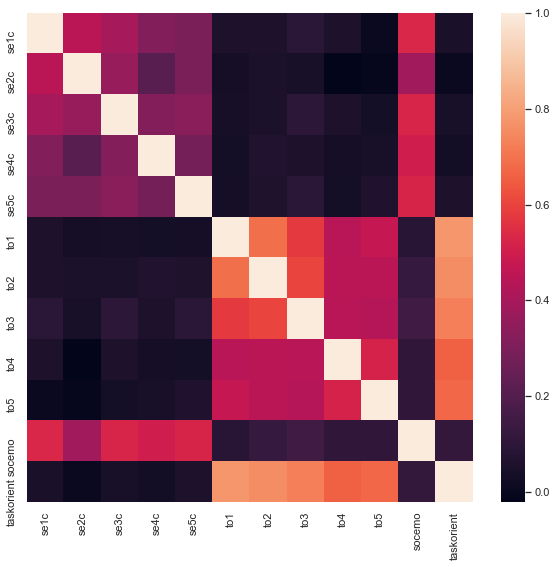

In [28]:
# Calculate correlations
corr = measureZambiaDF[["se1c", "se2c", "se3c", "se4c", "se5c", "to1", "to2", "to3", "to4", "to5", "socemo", "taskorient"]].corr()
# Heatmap
plt.figure()
sns.heatmap(corr)
plt.show()

In [234]:
corr

se1c      se2c      se3c      se4c      se5c       to1  \
se1c        1.000000  0.448828  0.397943  0.315406  0.299793  0.057045   
se2c        0.448828  1.000000  0.362351  0.215676  0.299680  0.034002   
se3c        0.397943  0.362351  1.000000  0.317611  0.332186  0.041432   
se4c        0.315406  0.215676  0.317611  1.000000  0.283498  0.033503   
se5c        0.299793  0.299680  0.332186  0.283498  1.000000  0.037358   
to1         0.057045  0.034002  0.041432  0.033503  0.037358  1.000000   
to2         0.055181  0.053028  0.049954  0.065899  0.061677  0.689873   
to3         0.092964  0.043206  0.101046  0.055018  0.090891  0.579799   
to4         0.057652 -0.022127  0.055205  0.037609  0.032899  0.443605   
to5         0.004773 -0.008994  0.030859  0.045378  0.062674  0.475216   
socemo      0.529947  0.386499  0.525709  0.501649  0.521056  0.086210   
taskorient  0.048885  0.006681  0.045439  0.027030  0.053759  0.776598   

                 to2       to3       to4       to5    socemo  taskorient  
se1c        0.055181  0.092964  0.057652  0.004773  0.529947    0.048885  
se2c        0.053028  0.043206 -0.022127 -0.008994  0.386499    0.006681  
se3c        0.049954  0.101046  0.055205  0.030859  0.525709    0.045439  
se4c        0.065899  0.055018  0.037609  0.045378  0.501649    0.027030  
se5c        0.061677  0.090891  0.032899  0.062674  0.521056    0.053759  
to1         0.689873  0.579799  0.443605  0.475216  0.086210    0.776598  
to2         1.000000  0.604540  0.448777  0.448261  0.124137    0.759687  
to3         0.604540  1.000000  0.444270  0.430099  0.151745    0.725361  
to4         0.448777  0.444270  1.000000  0.518978  0.106936    0.657686  
to5         0.448261  0.430099  0.518978  1.000000  0.108867    0.673800  
socemo      0.124137  0.151745  0.106936  0.108867  1.000000    0.115544  
taskorient  0.759687  0.725361  0.657686  0.673800  0.115544    1.000000

In [29]:
%%R -i measureZambiaDF
model <- '
    to_latent  =~ to1 + to2 + to3 + to4 + to5 
    se_latent  =~ se1c + se2c + se3c + se4c + se5c 
'
fit <- cfa(model, data=measureZambiaDF)
summary(fit, fit.measures=TRUE)

C:\Users\sr876\AppData\Local\Continuum\anaconda3\lib\site-packages\rpy2-2.9.4-py3.7-win-amd64.egg\rpy2\robjects\pandas2ri.py:67: UserWarning: Error while trying to convert the column "se1". Fall back to string conversion. The error is: Error in as.character.factor(x) : malformed factor

  (name, str(e)))
C:\Users\sr876\AppData\Local\Continuum\anaconda3\lib\site-packages\rpy2-2.9.4-py3.7-win-amd64.egg\rpy2\robjects\pandas2ri.py:67: UserWarning: Error while trying to convert the column "se2". Fall back to string conversion. The error is: Error in as.character.factor(x) : malformed factor

  (name, str(e)))
C:\Users\sr876\AppData\Local\Continuum\anaconda3\lib\site-packages\rpy2-2.9.4-py3.7-win-amd64.egg\rpy2\robjects\pandas2ri.py:67: UserWarning: Error while trying to convert the column "se3". Fall back to string conversion. The error is: Error in as.character.factor(x) : malformed factor

  (name, str(e)))
C:\Users\sr876\AppData\Local\Continuum\anaconda3\lib\site-packages\rpy2-2.9.4-py3.

lavaan 0.6-2 ended normally after 29 iterations

  Optimization method                           NLMINB
  Number of free parameters                         21

                                                  Used       Total
  Number of observations                          1547        1623

  Estimator                                         ML
  Model Fit Test Statistic                     219.773
  Degrees of freedom                                34
  P-value (Chi-square)                           0.000

Model test baseline model:

  Minimum Function Test Statistic             4175.115
  Degrees of freedom                                45
  P-value                                        0.000

User model versus baseline model:

  Comparative Fit Index (CFI)                    0.955
  Tucker-Lewis Index (TLI)                       0.940

Loglikelihood and Information Criteria:

  Loglikelihood user model (H0)             -19814.396
  Loglikelihood unrestricted model (H1)     -197

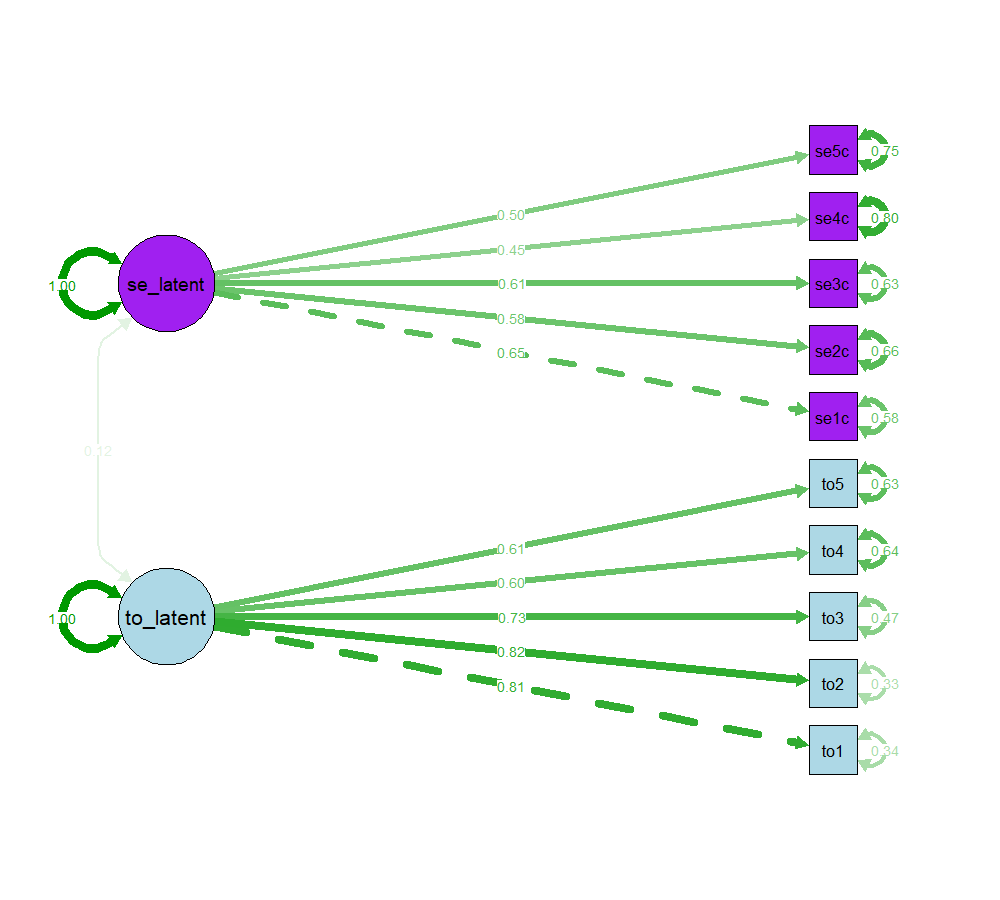

In [241]:
%%R
semPaths(fit, "std", curvePivot=TRUE, intercepts=FALSE, layout="tree2", rotation=2, nCharNodes=9, sizeMan=5, sizeLat=10,
         groups="latents",
         color=c("lightblue", "purple"))

TODO: compare against models (similar to above) that use one latent factor instead of two, or that load some indicators (e.g. se4c) to both.

### Combining structural and measurement models for Structural Regression

Let's test whether ECE partially explains the relation between wealth and children's socioemotional and task orientation skills.

In [243]:
# we need dummy coding again here, to use ECE
dummiedMeasureZambiaDF = pd.get_dummies(measureZambiaDF, dtype=np.int8)
# We use int8 instead of uint8 for the dummy variables, because R has no unsigned integers,
# so we would get warnings when passing these new variables into R.
# Further: the new dummy columns use the actual value as part of the column name,
# and therefore might have spaces in the column name.
# this is not great for specifying models, so let us replace the spaces with underscores:
dummiedMeasureZambiaDF.columns = dummiedMeasureZambiaDF.columns.str.replace(' ', '_')

In [244]:
%%R -i dummiedMeasureZambiaDF
fullsrmodel <- '
    to_latent =~ to1 + to2 + to3 + to4 + to5 
    se_latent =~ se1c + se2c + se3c + se4c + se5c 
    ece_ECE   ~ wealth
    se_latent ~ ece_ECE + wealth
    to_latent ~ ece_ECE + wealth
'
srsemfit <- sem(model=fullsrmodel, data=dummiedMeasureZambiaDF, estimator="MLR", meanstructure=TRUE)
summary(srsemfit, standardized=TRUE)

lavaan 0.6-2 ended normally after 52 iterations

  Optimization method                           NLMINB
  Number of free parameters                         38

                                                  Used       Total
  Number of observations                          1547        1623

  Estimator                                         ML      Robust
  Model Fit Test Statistic                     242.490     224.444
  Degrees of freedom                                50          50
  P-value (Chi-square)                           0.000       0.000
  Scaling correction factor                                  1.080
    for the Yuan-Bentler correction (Mplus variant)

Parameter Estimates:

  Information                                 Observed
  Observed information based on                Hessian
  Standard Errors                   Robust.huber.white

Latent Variables:
                   Estimate  Std.Err  z-value  P(>|z|)   Std.lv  Std.all
  to_latent =~                        

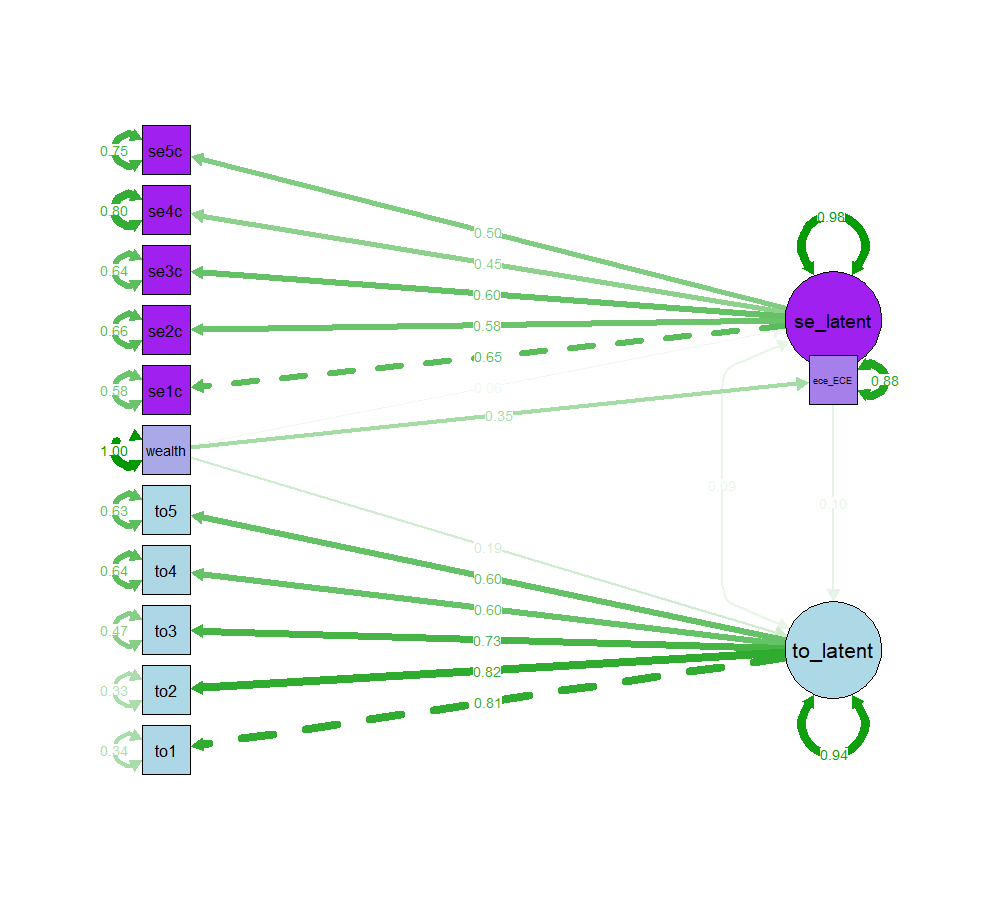

In [245]:
%%R
semPaths(srsemfit, "std", curvePivot=TRUE, intercepts=FALSE, layout="tree2", rotation=2, nCharNodes=9, sizeMan=5, sizeLat=10,
         groups="latents",
         color=c("lightblue", "purple"))

## Presenting the Results

## Notes on Aspects Skipped

* Power calculations. Is the number of subjects/observations large enough for the number of parameters/connections to be estimated. In general, SEM needs large sample sizes above 100.
* ...

## For reference: some models from tutorials with built-in data

In [85]:
%%R
model <- ' visual  =~ x1 + x2 + x3 
              textual =~ x4 + x5 + x6
              speed   =~ x7 + x8 + x9 '
fit <- cfa(model, data=HolzingerSwineford1939)

In [86]:
%%R
summary(fit, fit.measures=TRUE)

lavaan 0.6-2 ended normally after 35 iterations

  Optimization method                           NLMINB
  Number of free parameters                         21

  Number of observations                           301

  Estimator                                         ML
  Model Fit Test Statistic                      85.306
  Degrees of freedom                                24
  P-value (Chi-square)                           0.000

Model test baseline model:

  Minimum Function Test Statistic              918.852
  Degrees of freedom                                36
  P-value                                        0.000

User model versus baseline model:

  Comparative Fit Index (CFI)                    0.931
  Tucker-Lewis Index (TLI)                       0.896

Loglikelihood and Information Criteria:

  Loglikelihood user model (H0)              -3737.745
  Loglikelihood unrestricted model (H1)      -3695.092

  Number of free parameters                         21
  Akaike (AIC)  

In [87]:
%%R
model <- '
  x1 ~ y3
  # measurement model
  #  ind60 =~ x1 + x2 + x3
  #  dem60 =~ y1 + y2 + y3 + y4
  #  dem65 =~ y5 + y6 + y7 + y8
  # regressions
  #  dem60 ~ ind60
  #  dem65 ~ ind60 + dem60
'
fit <- sem(model, data=PoliticalDemocracy)
summary(fit, standardized=TRUE)

lavaan 0.6-2 ended normally after 10 iterations

  Optimization method                           NLMINB
  Number of free parameters                          2

  Number of observations                            75

  Estimator                                         ML
  Model Fit Test Statistic                       0.000
  Degrees of freedom                                 0

Parameter Estimates:

  Information                                 Expected
  Information saturated (h1) model          Structured
  Standard Errors                             Standard

Regressions:
                   Estimate  Std.Err  z-value  P(>|z|)   Std.lv  Std.all
  x1 ~                                                                  
    y3                0.073    0.024    2.999    0.003    0.073    0.327

Variances:
                   Estimate  Std.Err  z-value  P(>|z|)   Std.lv  Std.all
   .x1                0.473    0.077    6.124    0.000    0.473    0.893

